In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(seed=2017)

In [3]:
#reading data set
dataset=pd.read_csv('loan-prediction.csv')

In [4]:
#data cleaning
dataset['LoanAmount'].fillna(np.mean(dataset.LoanAmount),inplace=True)
dataset.fillna(method='ffill',inplace = True) #replace nan value by replaching exhisting prev value
#dataset.dropna(how='any',inplace=True)

In [5]:
#non numarical to numarical conversion
d=dataset
d.Property_Area.replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
d.Married.replace(['Yes','No'],[1,0],inplace=True)
d.Gender.replace(['Male','Female'],[1,0],inplace=True)
d.Education.replace(['Graduate','Not Graduate'],[1,0],inplace=True)
d.Self_Employed.replace(['Yes','No'],[1,0],inplace=True)
d.Dependents.replace(['0','1','2','3+'],[0,1,2,3],inplace=True)
d.Loan_Status.replace(['Y','N'],[1,0],inplace=True)

In [6]:
dataset=d
dataset.to_csv('loan-prediction1.csv',index=False)

In [7]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]
#split the data set for training and testing
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2017) #random state=same seed

In [8]:
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std=sc.transform(X)

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [9]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [10]:
from sklearn import svm 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

Training set score svm_cls_rbf: 0.934732
Test set score svm_cls_rbf: 0.740541
Total score svm_cls_rbf: 0.876221
Classification report for svm_cls_rbf:
              precision    recall  f1-score   support

           0       0.62      0.38      0.47        56
           1       0.77      0.90      0.83       129

   micro avg       0.74      0.74      0.74       185
   macro avg       0.69      0.64      0.65       185
weighted avg       0.72      0.74      0.72       185


Confusion matrix for svm_cls_rbf on test:
[[ 21  35]
 [ 13 116]]
Classification report for svm_cls_rbf:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       136
           1       0.92      0.99      0.95       293

   micro avg       0.93      0.93      0.93       429
   macro avg       0.95      0.90      0.92       429
weighted avg       0.94      0.93      0.93       429


Confusion matrix for svm_cls_rbf on train:
[[110  26]
 [  2 291]]
Classification report f

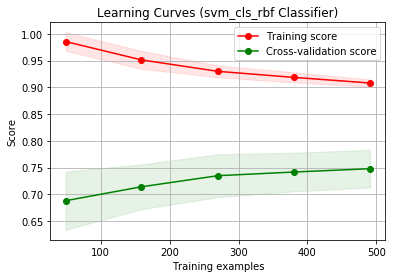

In [11]:
svm_cls_rbf = svm.SVC(gamma=0.05,C=100,kernel='rbf')
svm_cls_rbf.fit(X_train_std, y_train)

print("Training set score svm_cls_rbf: %f" % svm_cls_rbf.score(X_train_std, y_train))
print("Test set score svm_cls_rbf: %f" % svm_cls_rbf.score(X_test_std, y_test))
print("Total score svm_cls_rbf: %f" % svm_cls_rbf.score(X_std, y))

print("Classification report for svm_cls_rbf:\n%s\n"% (classification_report(y_test, svm_cls_rbf.predict(X_test_std))))
print("Confusion matrix for svm_cls_rbf on test:\n%s" % (confusion_matrix(y_test, svm_cls_rbf.predict(X_test_std))))

print("Classification report for svm_cls_rbf:\n%s\n"% (classification_report(y_train, svm_cls_rbf.predict(X_train_std))))
print("Confusion matrix for svm_cls_rbf on train:\n%s" % (confusion_matrix(y_train, svm_cls_rbf.predict(X_train_std))))

print("Classification report for svm_cls_rbf:\n%s\n"% (classification_report(y, svm_cls_rbf.predict(X_std))))
print("Confusion matrix for svm_cls_rbf on total:\n%s" % (confusion_matrix(y, svm_cls_rbf.predict(X_std))))

cvs=cross_val_score(svm_cls_rbf , X_std, y, cv=10)
print(cvs)

plot_learning_curve(svm_cls_rbf,"Learning Curves (svm_cls_rbf Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

Training set score svm_cls_lin: 0.820513
Test set score svm_cls_lin: 0.772973
Total score svm_cls_lin: 0.806189
Classification report for svm_cls_lin:
              precision    recall  f1-score   support

           0       0.82      0.32      0.46        56
           1       0.77      0.97      0.86       129

   micro avg       0.77      0.77      0.77       185
   macro avg       0.79      0.65      0.66       185
weighted avg       0.78      0.77      0.74       185


Confusion matrix for svm_cls_lin on test:
[[ 18  38]
 [  4 125]]
Classification report for svm_cls_lin:
              precision    recall  f1-score   support

           0       0.87      0.51      0.64       136
           1       0.81      0.97      0.88       293

   micro avg       0.82      0.82      0.82       429
   macro avg       0.84      0.74      0.76       429
weighted avg       0.83      0.82      0.80       429


Confusion matrix for svm_cls_lin on train:
[[ 69  67]
 [ 10 283]]
Classification report f

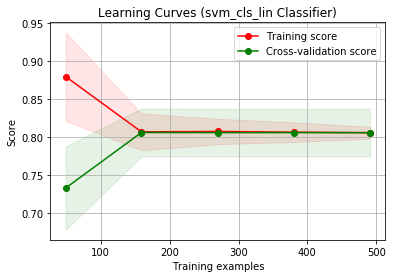

In [12]:
svm_cls_lin = svm.SVC(gamma=0.05,C=100,kernel='linear')
svm_cls_lin.fit(X_train_std, y_train)

print("Training set score svm_cls_lin: %f" % svm_cls_lin.score(X_train_std, y_train))
print("Test set score svm_cls_lin: %f" % svm_cls_lin.score(X_test_std, y_test))
print("Total score svm_cls_lin: %f" % svm_cls_lin.score(X_std, y))

print("Classification report for svm_cls_lin:\n%s\n"% (classification_report(y_test, svm_cls_lin.predict(X_test_std))))
print("Confusion matrix for svm_cls_lin on test:\n%s" % (confusion_matrix(y_test, svm_cls_lin.predict(X_test_std))))

print("Classification report for svm_cls_lin:\n%s\n"% (classification_report(y_train, svm_cls_lin.predict(X_train_std))))
print("Confusion matrix for svm_cls_lin on train:\n%s" % (confusion_matrix(y_train, svm_cls_lin.predict(X_train_std))))

print("Classification report for svm_cls_lin:\n%s\n"% (classification_report(y, svm_cls_lin.predict(X_std))))
print("Confusion matrix for svm_cls_lin on total:\n%s" % (confusion_matrix(y, svm_cls_lin.predict(X_std))))

cvs=cross_val_score(svm_cls_lin , X_std, y, cv=10)
print(cvs)

plot_learning_curve(svm_cls_lin,"Learning Curves (svm_cls_lin Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

Training set score svm_cls_pol: 0.923077
Test set score svm_cls_pol: 0.713514
Total score svm_cls_pol: 0.859935
Classification report for svm_cls_pol:
              precision    recall  f1-score   support

           0       0.55      0.29      0.38        56
           1       0.74      0.90      0.81       129

   micro avg       0.71      0.71      0.71       185
   macro avg       0.65      0.59      0.60       185
weighted avg       0.69      0.71      0.68       185


Confusion matrix for svm_cls_pol on test:
[[ 16  40]
 [ 13 116]]
Classification report for svm_cls_pol:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       136
           1       0.90      0.99      0.95       293

   micro avg       0.92      0.92      0.92       429
   macro avg       0.94      0.88      0.91       429
weighted avg       0.93      0.92      0.92       429


Confusion matrix for svm_cls_pol on train:
[[105  31]
 [  2 291]]
Classification report f

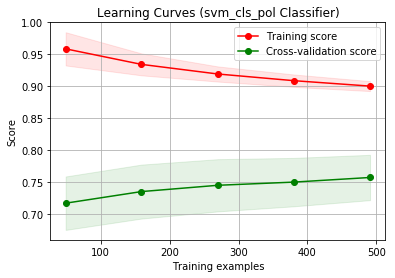

In [13]:
svm_cls_pol = svm.SVC(gamma=0.05,C=100,kernel='poly')
svm_cls_pol.fit(X_train_std, y_train)

print("Training set score svm_cls_pol: %f" % svm_cls_pol.score(X_train_std, y_train))
print("Test set score svm_cls_pol: %f" % svm_cls_pol.score(X_test_std, y_test))
print("Total score svm_cls_pol: %f" % svm_cls_pol.score(X_std, y))

print("Classification report for svm_cls_pol:\n%s\n"% (classification_report(y_test, svm_cls_pol.predict(X_test_std))))
print("Confusion matrix for svm_cls_pol on test:\n%s" % (confusion_matrix(y_test, svm_cls_pol.predict(X_test_std))))

print("Classification report for svm_cls_pol:\n%s\n"% (classification_report(y_train, svm_cls_pol.predict(X_train_std))))
print("Confusion matrix for svm_cls_pol on train:\n%s" % (confusion_matrix(y_train, svm_cls_pol.predict(X_train_std))))

print("Classification report for svm_cls_pol:\n%s\n"% (classification_report(y, svm_cls_pol.predict(X_std))))
print("Confusion matrix for svm_cls_pol on total:\n%s" % (confusion_matrix(y, svm_cls_pol.predict(X_std))))

cvs=cross_val_score(svm_cls_pol , X_std, y, cv=10)
print(cvs)

plot_learning_curve(svm_cls_pol,"Learning Curves (svm_cls_pol Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

Training set score svm_cls_sig: 0.811189
Test set score svm_cls_sig: 0.767568
Total score svm_cls_sig: 0.798046
Classification report for svm_cls_sig:
              precision    recall  f1-score   support

           0       0.76      0.34      0.47        56
           1       0.77      0.95      0.85       129

   micro avg       0.77      0.77      0.77       185
   macro avg       0.76      0.65      0.66       185
weighted avg       0.77      0.77      0.74       185


Confusion matrix for svm_cls_sig on test:
[[ 19  37]
 [  6 123]]
Classification report for svm_cls_sig:
              precision    recall  f1-score   support

           0       0.83      0.51      0.63       136
           1       0.81      0.95      0.87       293

   micro avg       0.81      0.81      0.81       429
   macro avg       0.82      0.73      0.75       429
weighted avg       0.81      0.81      0.80       429


Confusion matrix for svm_cls_sig on train:
[[ 69  67]
 [ 14 279]]
Classification report f

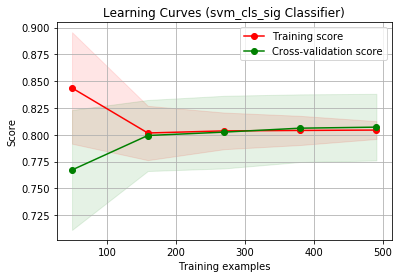

In [14]:
svm_cls_sig = svm.SVC(gamma=0.005,C=100,kernel='sigmoid')
svm_cls_sig.fit(X_train_std, y_train)

print("Training set score svm_cls_sig: %f" % svm_cls_sig.score(X_train_std, y_train))
print("Test set score svm_cls_sig: %f" % svm_cls_sig.score(X_test_std, y_test))
print("Total score svm_cls_sig: %f" % svm_cls_sig.score(X_std, y))

print("Classification report for svm_cls_sig:\n%s\n"% (classification_report(y_test, svm_cls_sig.predict(X_test_std))))
print("Confusion matrix for svm_cls_sig on test:\n%s" % (confusion_matrix(y_test, svm_cls_sig.predict(X_test_std))))

print("Classification report for svm_cls_sig:\n%s\n"% (classification_report(y_train, svm_cls_sig.predict(X_train_std))))
print("Confusion matrix for svm_cls_sig on train:\n%s" % (confusion_matrix(y_train, svm_cls_sig.predict(X_train_std))))

print("Classification report for svm_cls_sig:\n%s\n"% (classification_report(y, svm_cls_sig.predict(X_std))))
print("Confusion matrix for svm_cls_sig on total:\n%s" % (confusion_matrix(y, svm_cls_sig.predict(X_std))))

cvs=cross_val_score(svm_cls_sig , X_std, y, cv=10)
print(cvs)

plot_learning_curve(svm_cls_sig,"Learning Curves (svm_cls_sig Classifier)" , X_std,y,ylim=None,n_jobs=4)
plt.show()

In [15]:
import seaborn as sns
from sklearn import metrics
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


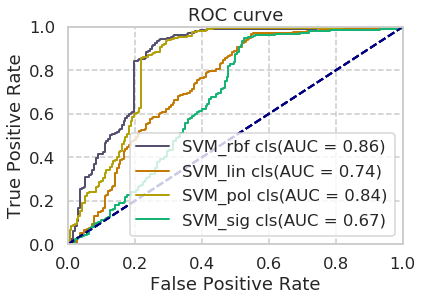

In [16]:
svm_cls_rbf_pred_proba=svm_cls_rbf.decision_function(X_std)
svm_cls_lin_pred_proba=svm_cls_lin.decision_function(X_std)
svm_cls_pol_pred_proba=svm_cls_pol.decision_function(X_std)
svm_cls_sig_pred_proba=svm_cls_sig.decision_function(X_std)

plotAUC(y,svm_cls_rbf_pred_proba,'SVM_rbf cls')
plotAUC(y,svm_cls_lin_pred_proba,'SVM_lin cls')
plotAUC(y,svm_cls_pol_pred_proba,'SVM_pol cls')
plotAUC(y,svm_cls_sig_pred_proba,'SVM_sig cls')

plt.show()

In [17]:
#storing all models
from sklearn.externals import joblib #dumping and loading model

joblib.dump(svm_cls_rbf,'svm_cls_rbf_model.joblib')
joblib.dump(svm_cls_lin,'svm_cls_lin_model.joblib')
joblib.dump(svm_cls_pol,'svm_cls_pol_model.joblib')
joblib.dump(svm_cls_sig,'svm_cls_sig_model.joblib')

['svm_cls_sig_model.joblib']